# Unsupervised learning & clustering

## Initialisation

In [77]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

## Deal with data

### Read the data

In [78]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Extract `annual income` and `spending score` with 2 columns 

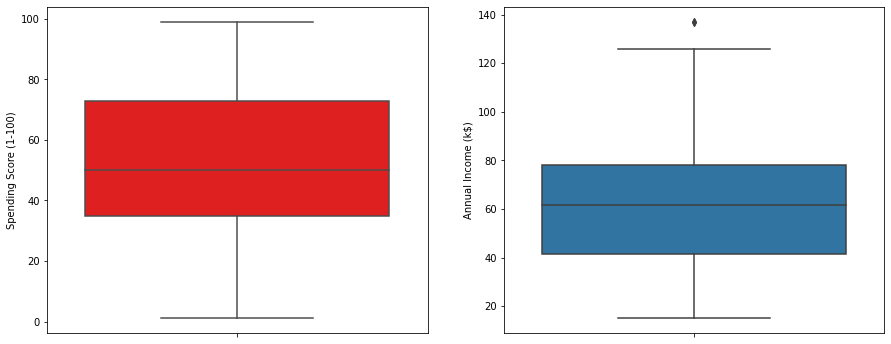

In [79]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

In [80]:
X=df.iloc[:, [3,4]].values

### Create the scatter plot 

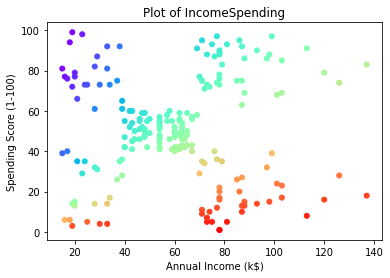

In [81]:
plt.scatter(X[:, 0], X[:, 1], s = 25, c=np.arctan2(X[:, 0], X[:, 1]), cmap='rainbow')
plt.title('Plot of IncomeSpending') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.show()

---
**Num of clusters**

We can spot 4-5 clusters from the diagram

---

## KMeans and inertia

### Determining the maximum number of clusters

#### Find max of KMeans

In [82]:
limit = int((X.shape[0]//2)**0.5)
limit


10

#### inertia

##### Create a list of inertia

In [83]:
inertiaList = [KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(X).inertia_/1000
                for i in range(1, limit)] 

##### Print the list

In [84]:
print("List of inertia, divide by 1000 to get easy overview")
for idx, i in enumerate(inertiaList):
    print('Inertia for k = {}: {:<.3f}'.format(idx+1, i))

List of inertia, divide by 1000 to get easy overview
Inertia for k = 1: 269.981
Inertia for k = 2: 181.364
Inertia for k = 3: 106.348
Inertia for k = 4: 73.680
Inertia for k = 5: 44.448
Inertia for k = 6: 37.234
Inertia for k = 7: 30.260
Inertia for k = 8: 25.012
Inertia for k = 9: 21.850


#### Plot the inertia curve 

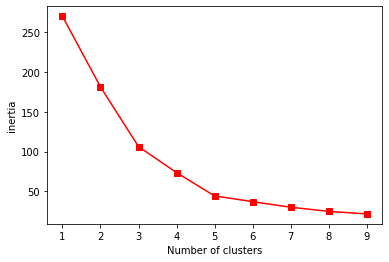

In [85]:
plt.plot(range(1, limit), inertiaList, 'rs-')
plt.xlabel('Number of clusters')
plt.ylabel('inertia') 
plt.show()

---
**Optimal number of clusters**

The point where the elbow shape is created is 5, which means our K value or optimal number of clusters is 5.

---

#### Create KMeans with 5 clusters

In [86]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)


#### Visualize and interpret the clusters

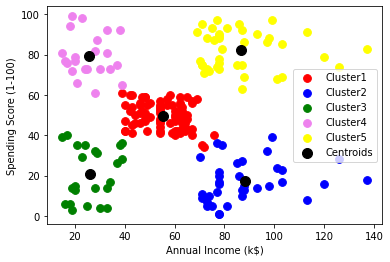

In [87]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()

####  Silhoutte score

In [88]:
for k in range(2, limit):
	model = KMeans(n_clusters=k)
	model.fit(X)
	pred = model.predict(X)
	score = silhouette_score(X, pred)
	print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.283
Silhouette Score for k = 3: 0.468
Silhouette Score for k = 4: 0.493
Silhouette Score for k = 5: 0.554
Silhouette Score for k = 6: 0.538
Silhouette Score for k = 7: 0.526
Silhouette Score for k = 8: 0.454
Silhouette Score for k = 9: 0.459
